In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
import pandas as pd
from sklearn.metrics import mean_squared_error

In [3]:
def get_reconstruction(eigenvectors, Mean, x):
    # Compute the projection of the data on the top eigen-vectors
    Eig= np.matrix(eigenvectors)
    #
    matrix = np.matrix(x) - Mean
    matrix[np.isnan(matrix)] = 0
    m_projection = matrix * Eig;
    #
    rec = np.array(m_projection * Eig.transpose() + Mean)
    #rec= Eig*m_projection.transpose()+Mean[:,np.newaxis]
    rec = np.ravel(rec)
    return (x, rec)

In [4]:
def set_xaxis(ax, n_x):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')

In [5]:
figsize= (16,8)

# Reconstruction on Top Eigenvectors with Root Mean Square Error

In [18]:
partitions= ['weekday', 'weekend']
years= [2008, 2009, 2010, 2011, 2013, 2014, 2015]

base_mean_path= './data/{}/total_flow_{}_mean_vector.pivot_{}_grouping_pca_tmp.csv'
base_eigs_path= './data/{}/total_flow_{}_eigenvectors.pivot_{}_grouping_pca_tmp.csv'
base_samples_path= './data/{}/total_flow_{}_samples.pivot_{}_grouping_pca_tmp.csv'

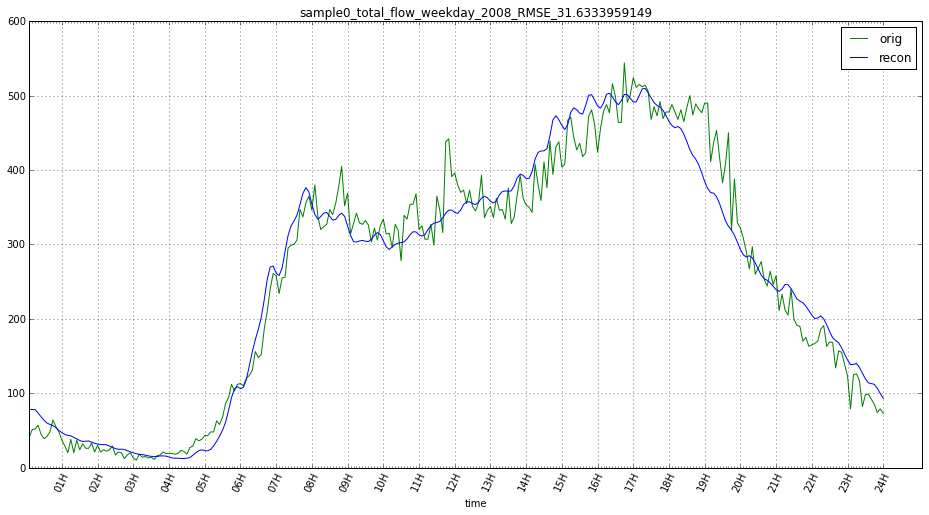

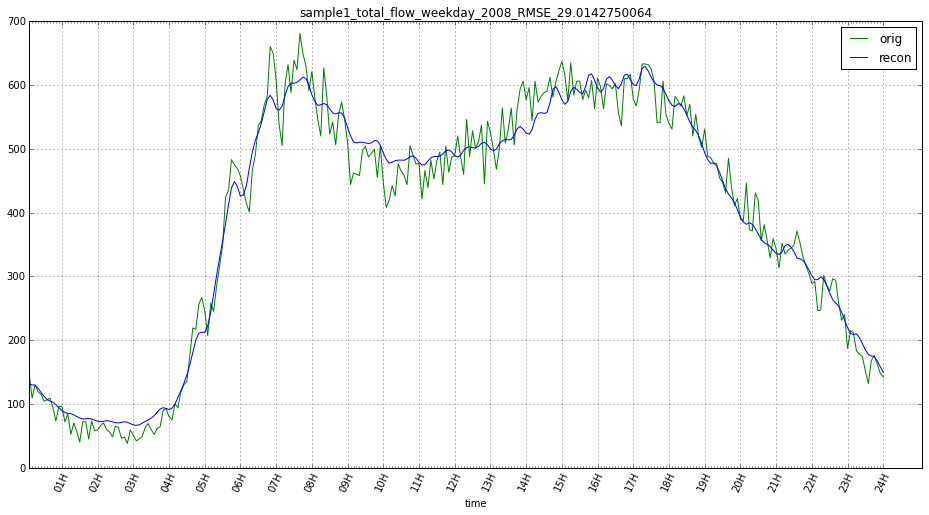

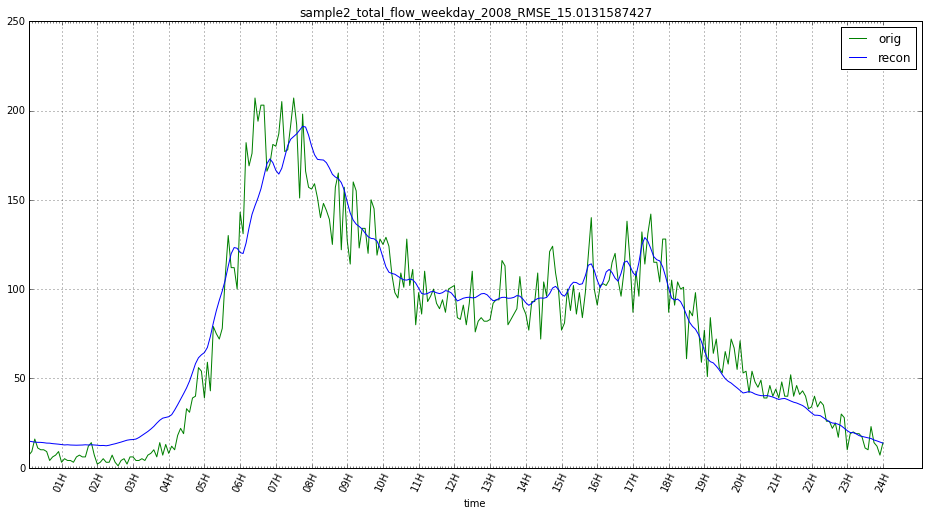

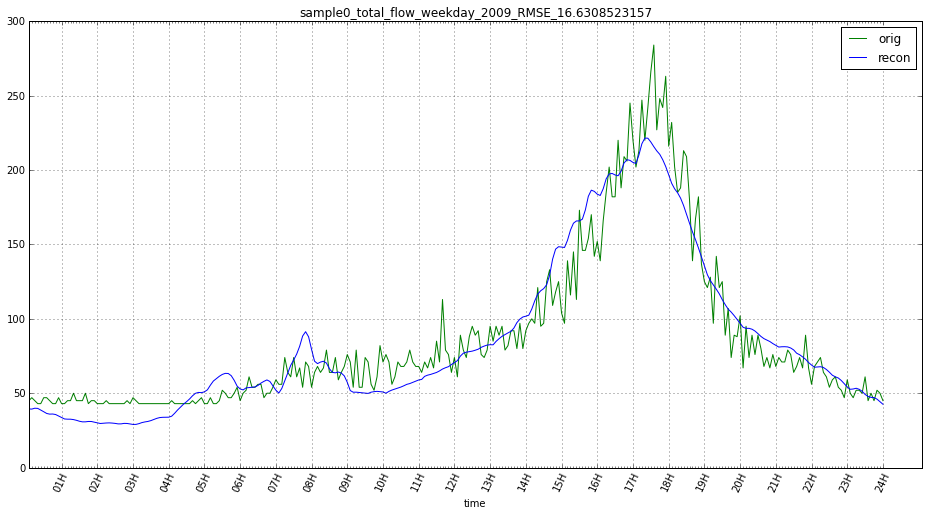

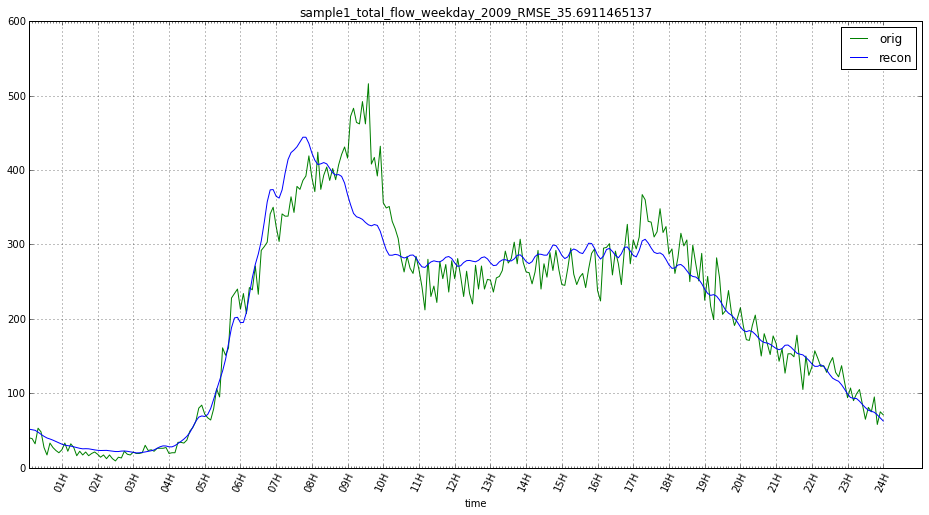

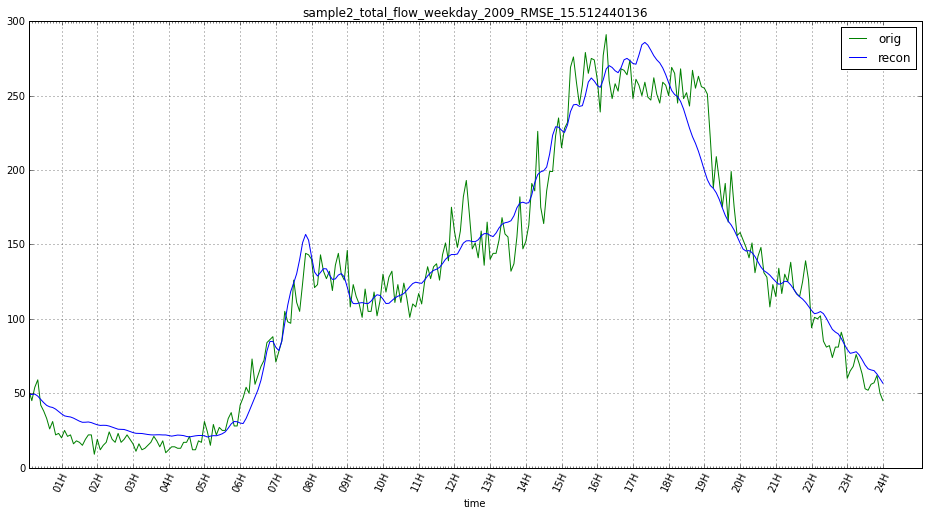

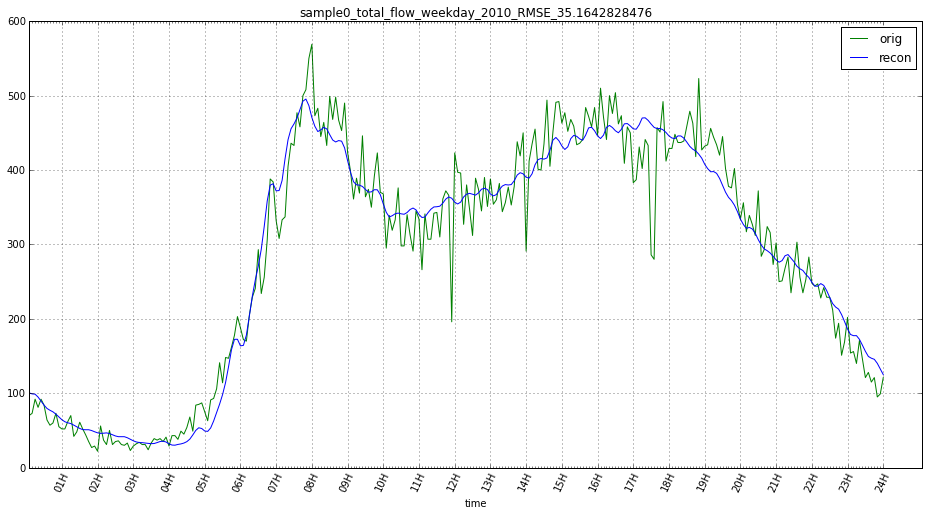

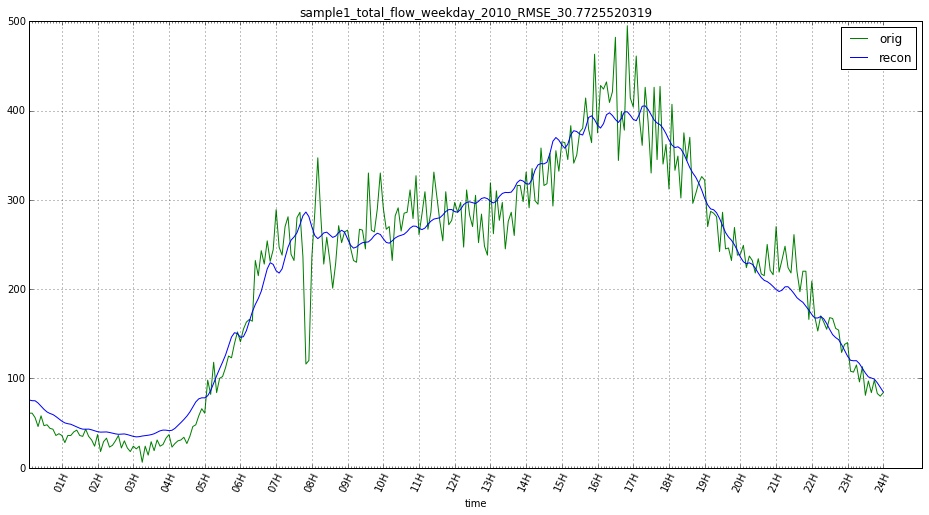

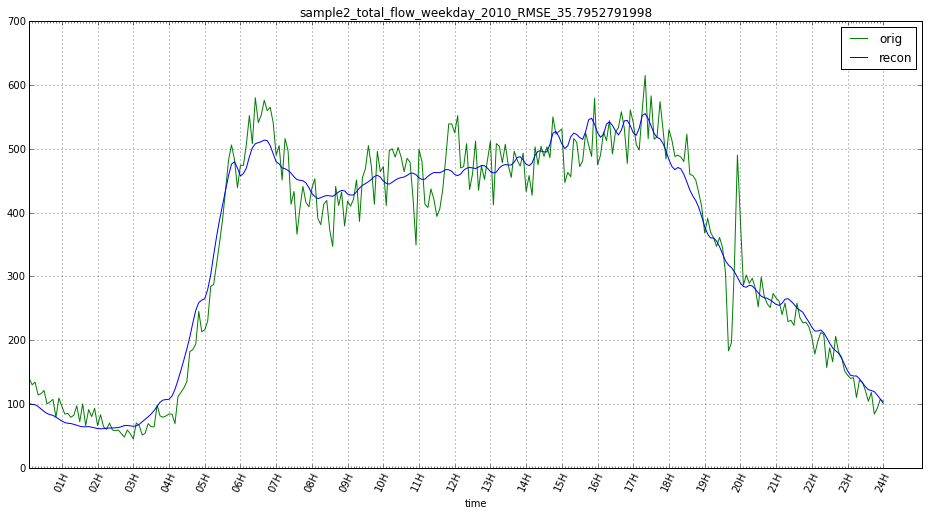

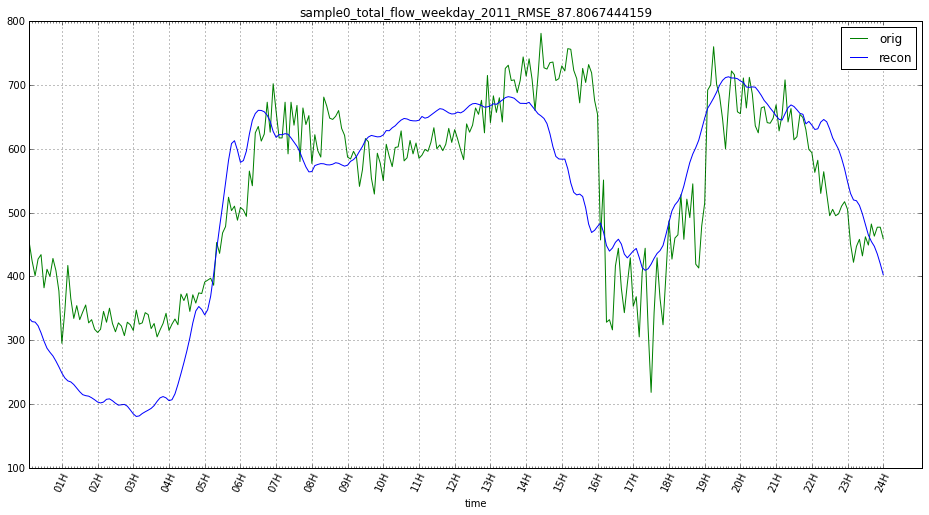

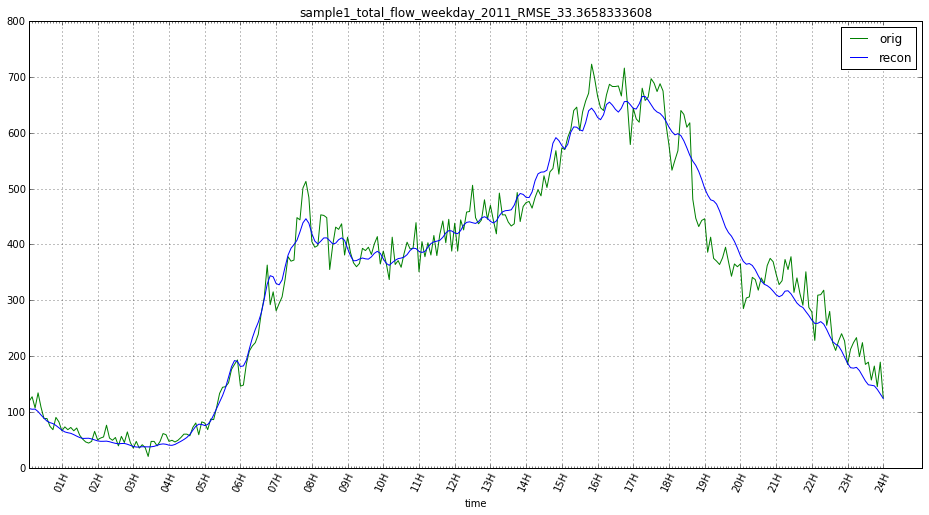

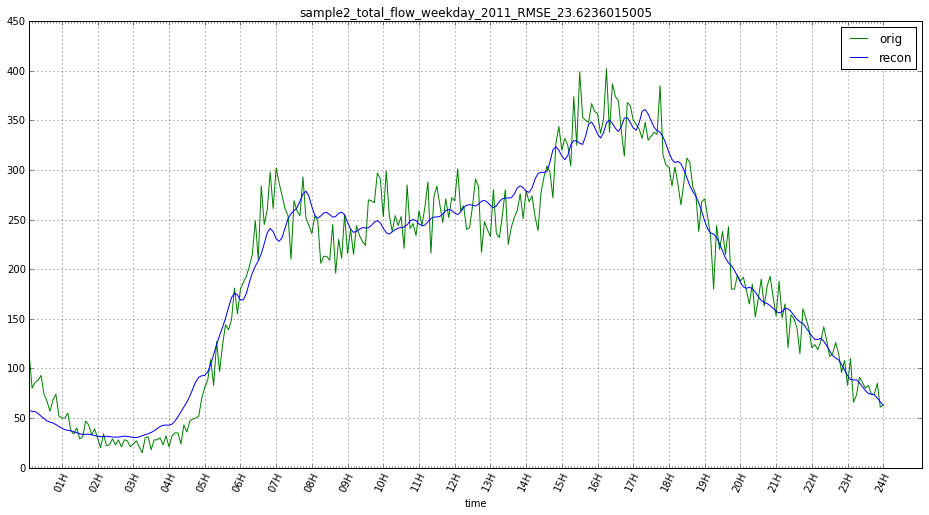

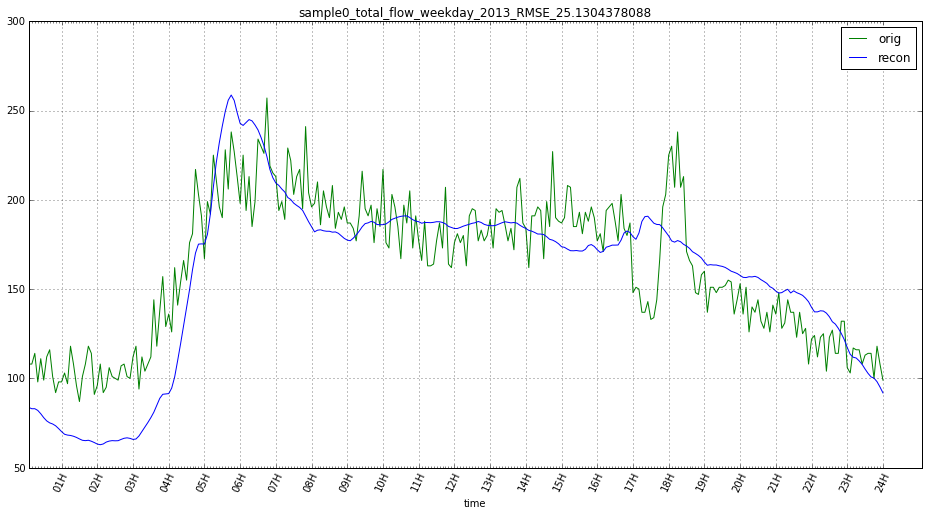

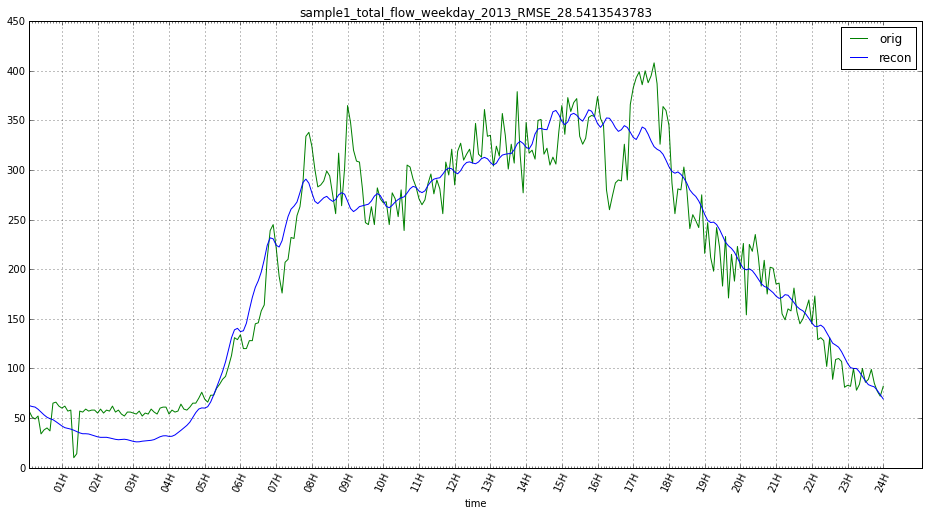

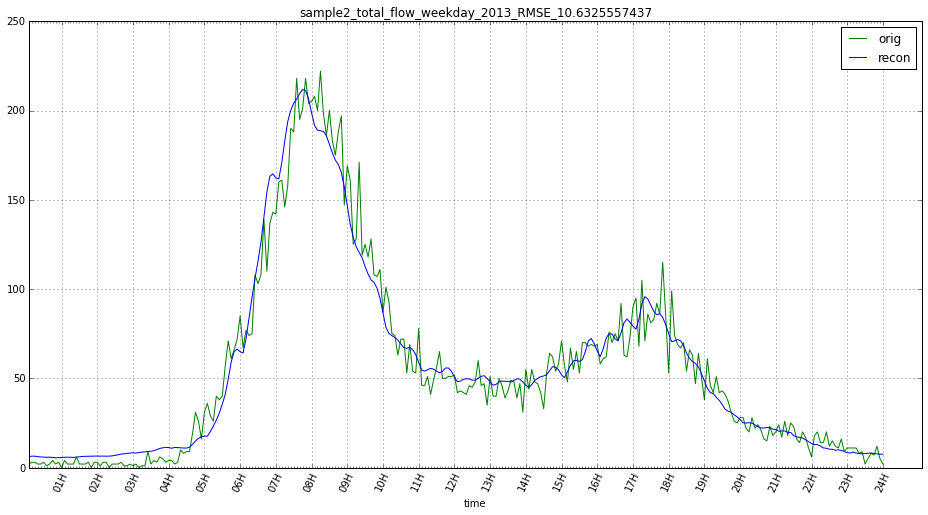

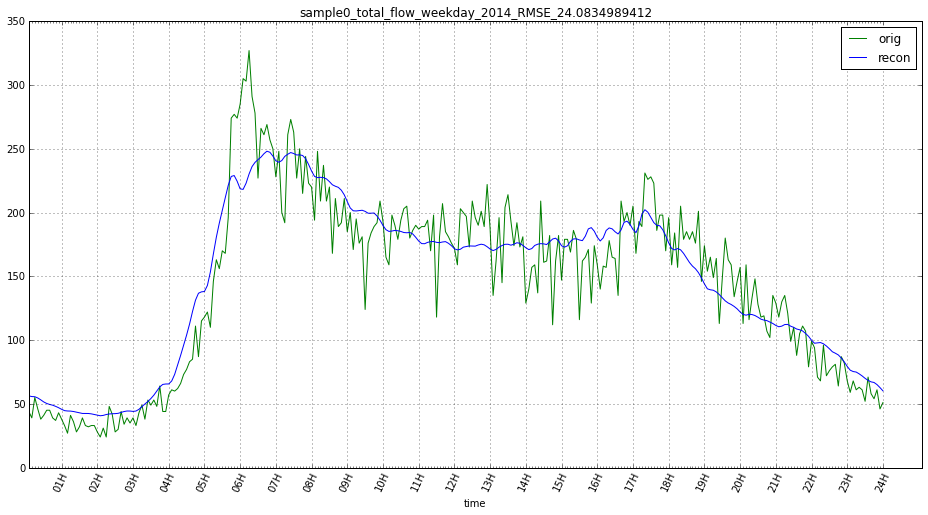

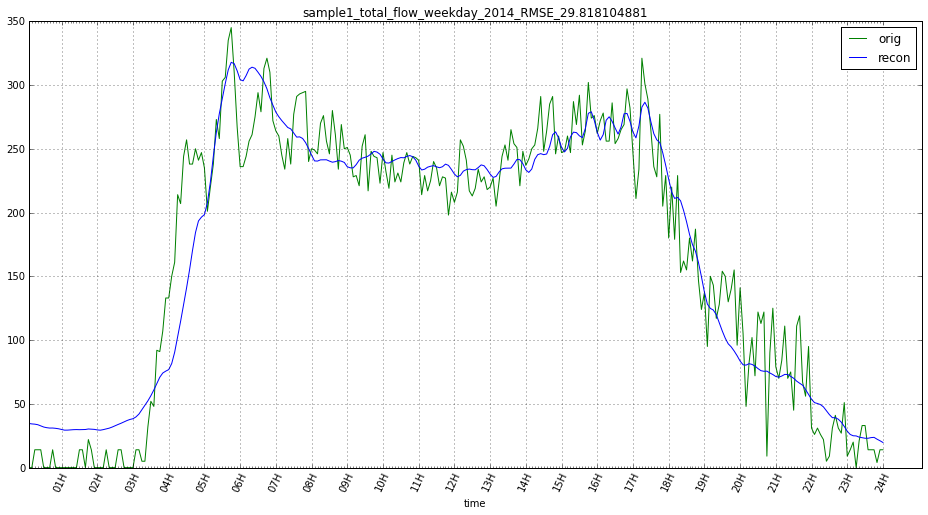

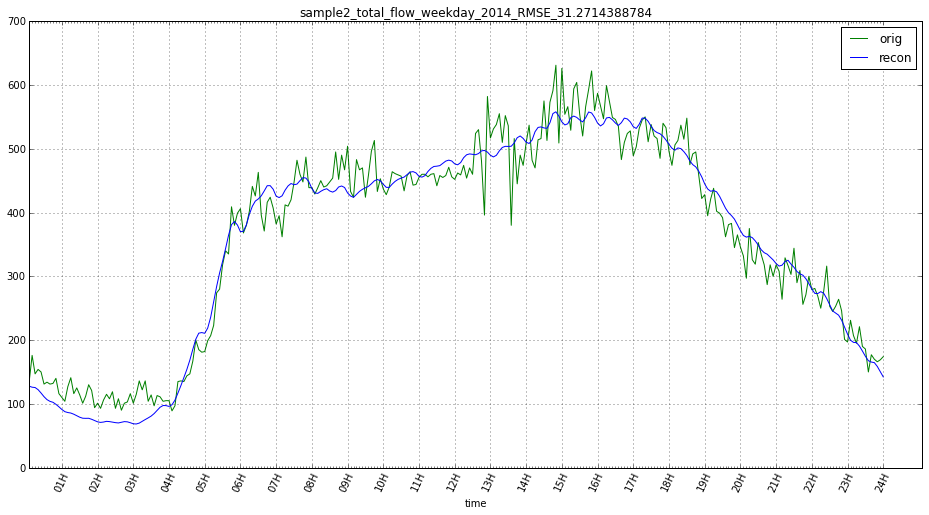

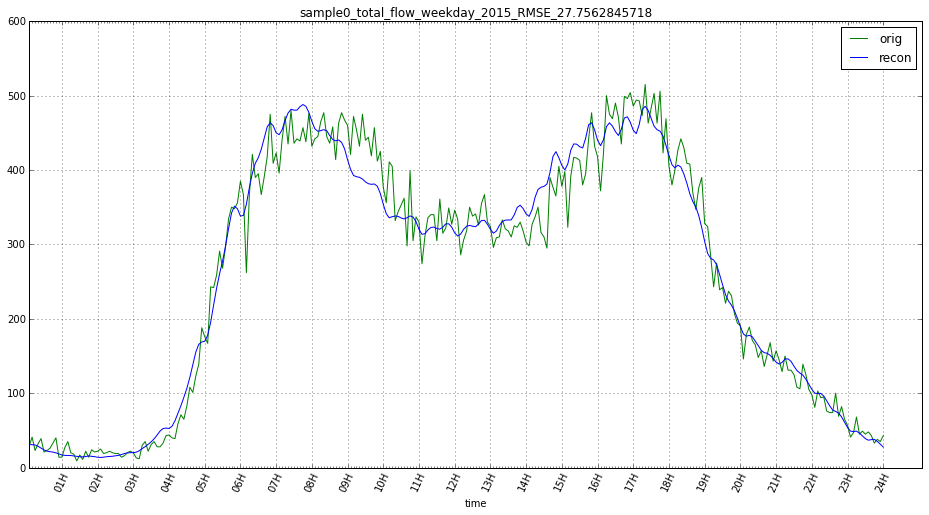

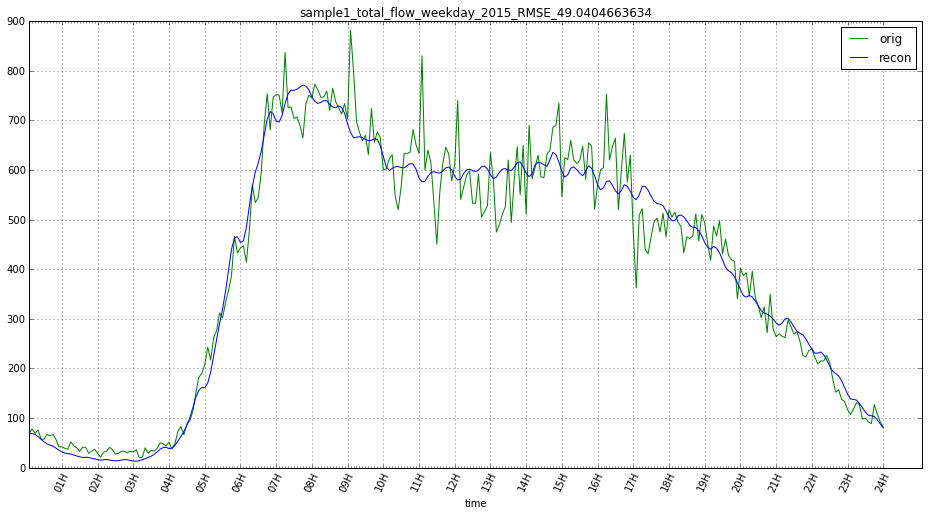

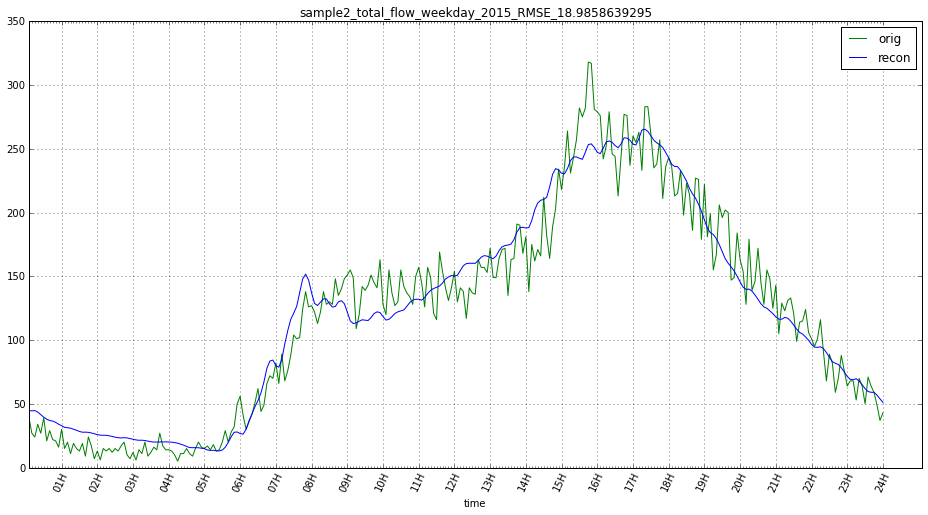

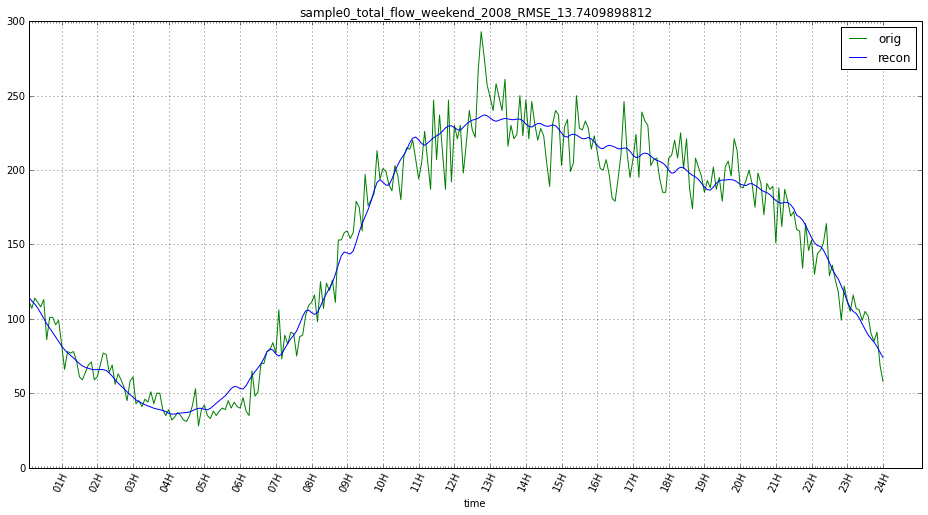

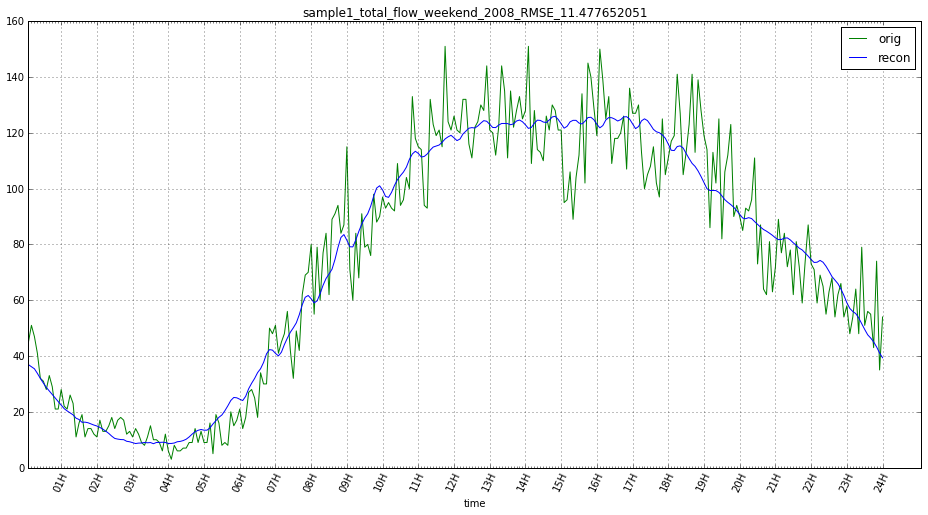

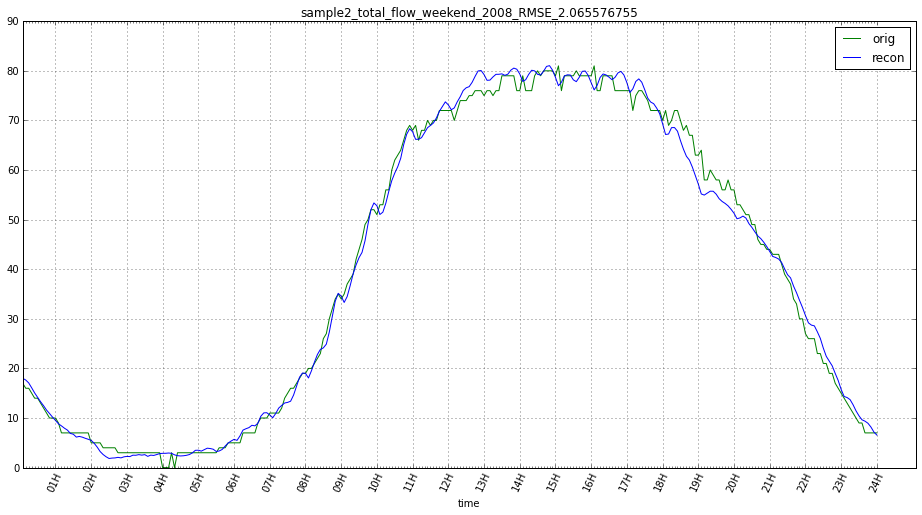

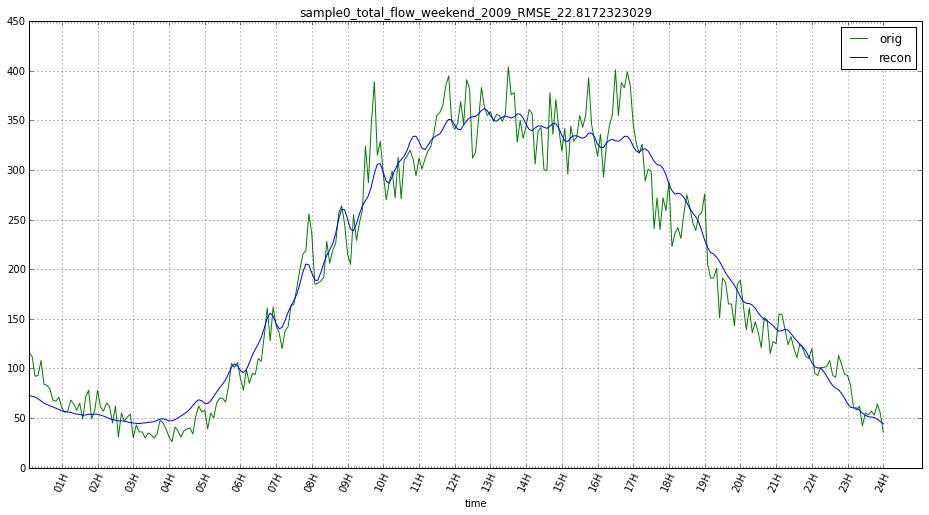

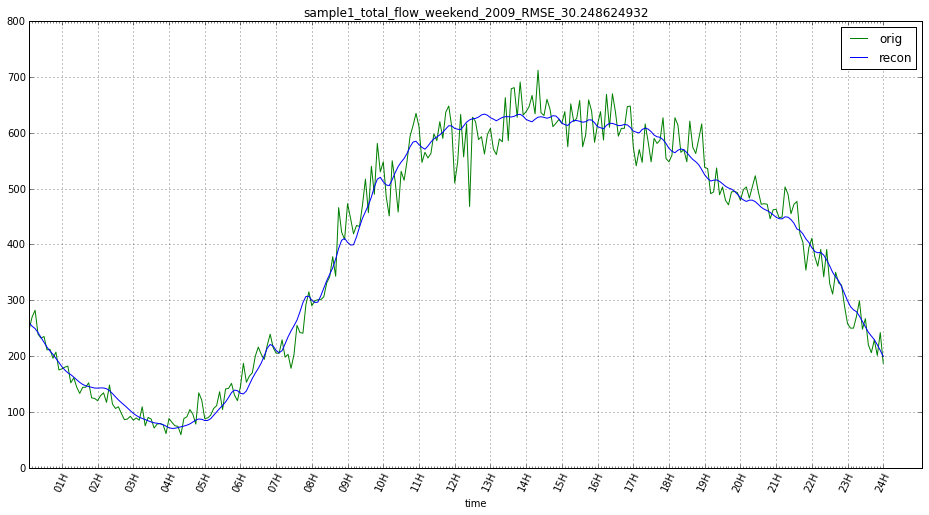

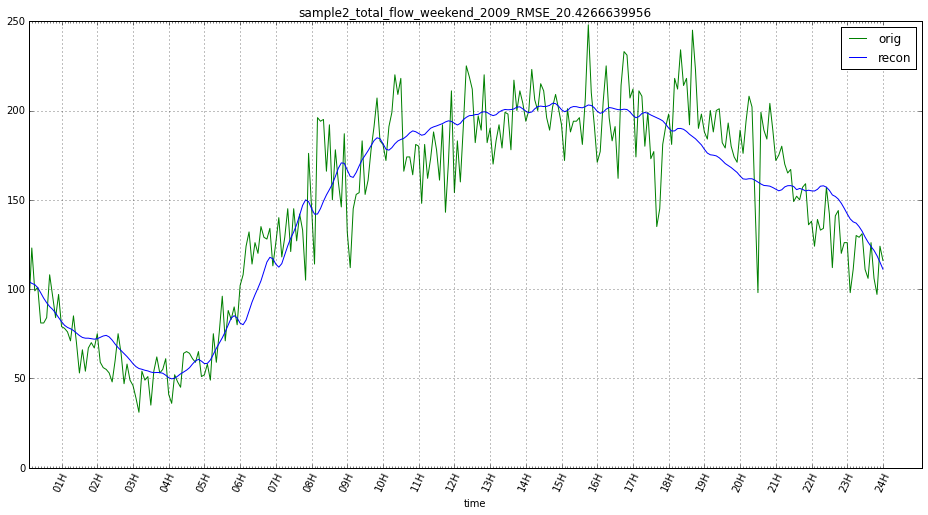

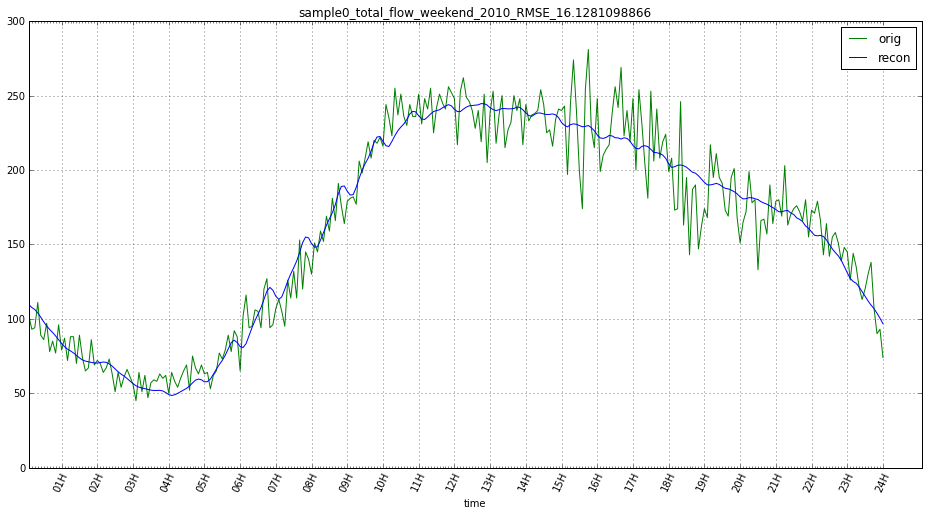

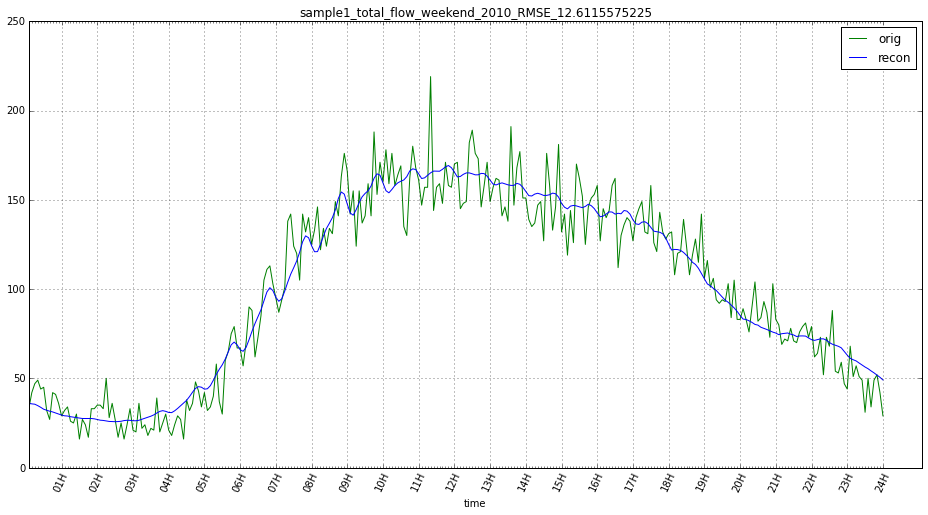

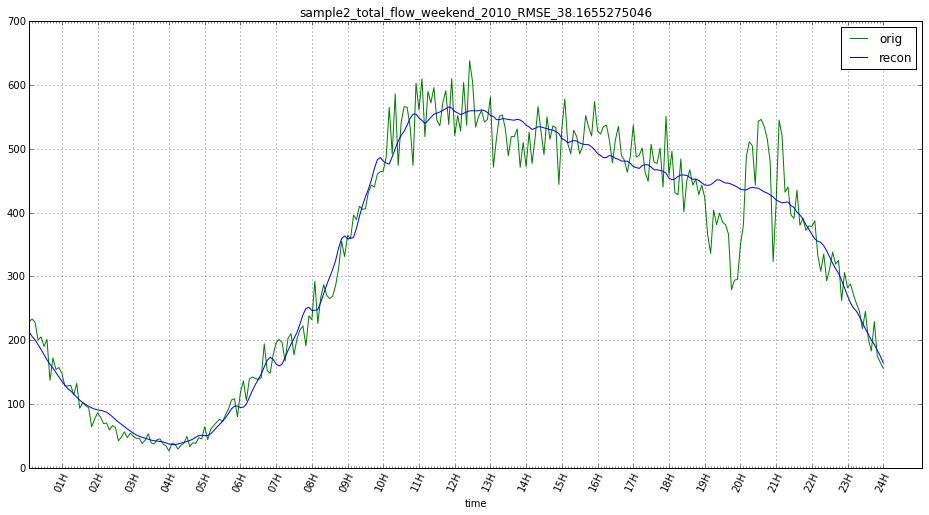

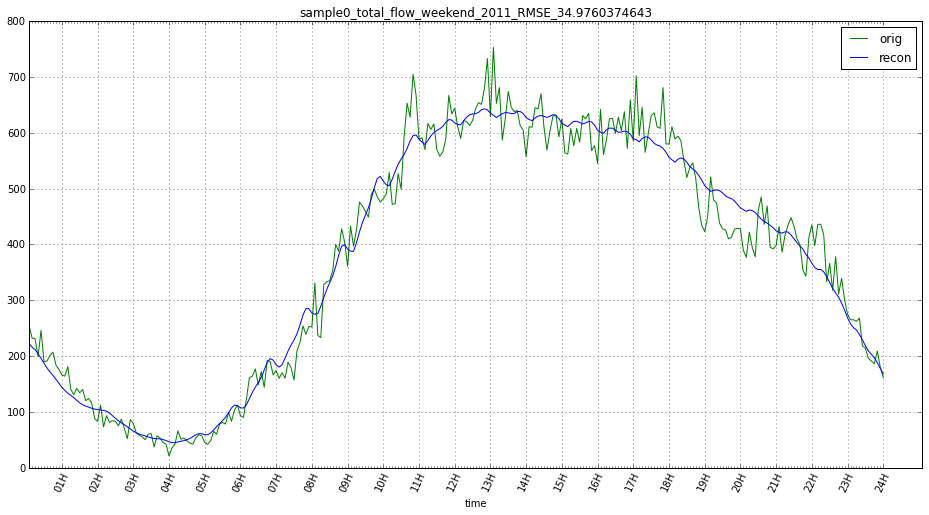

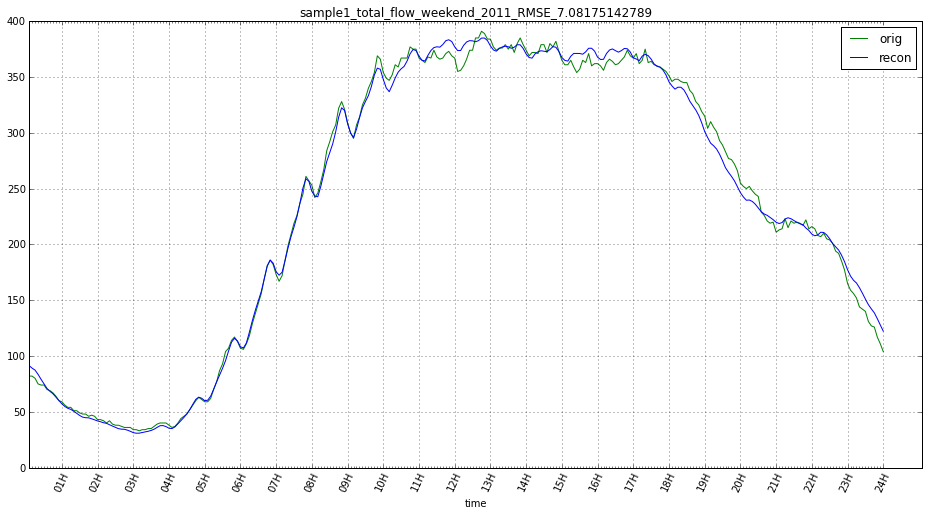

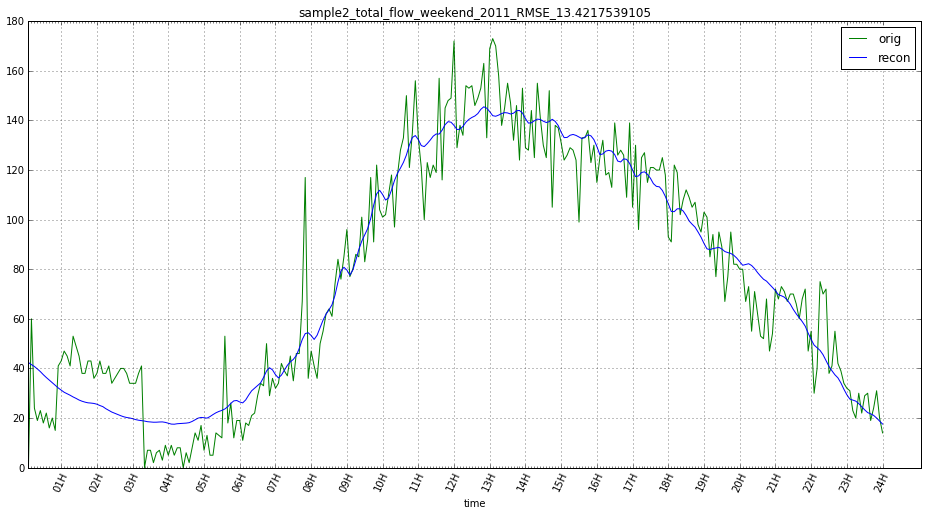

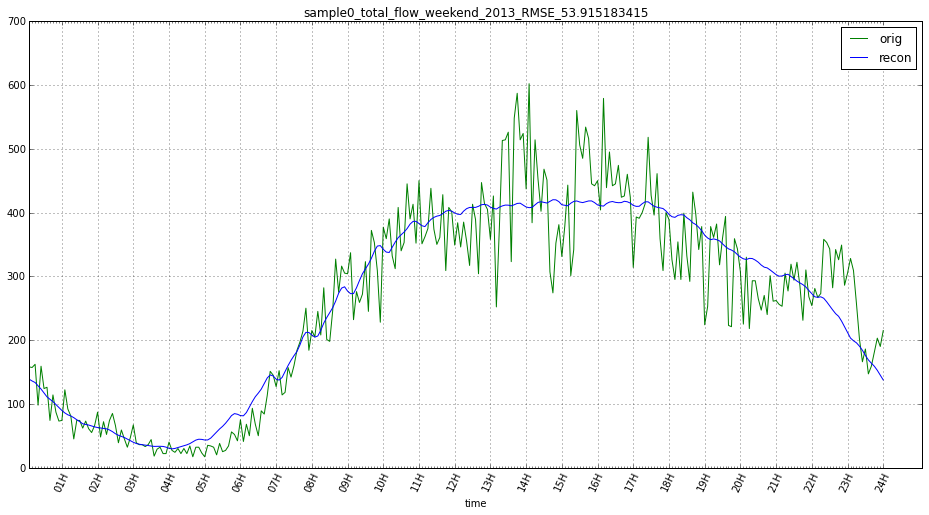

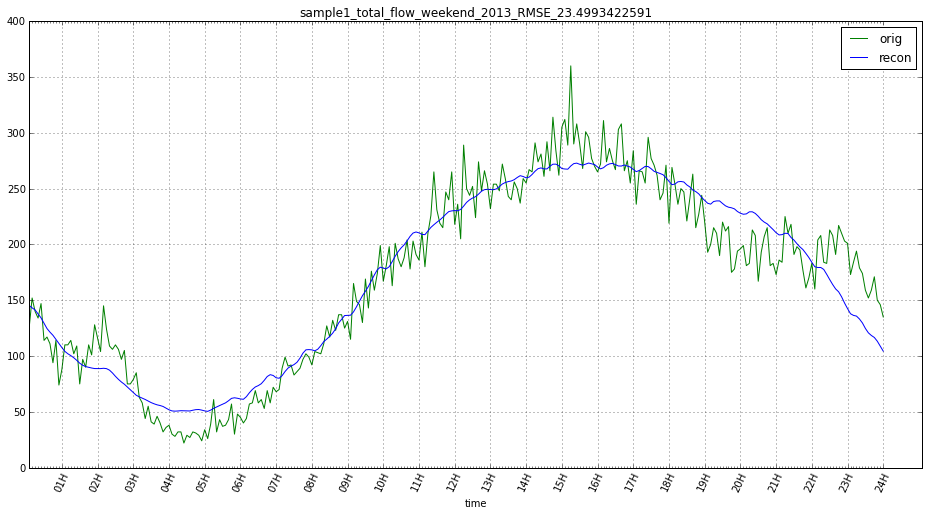

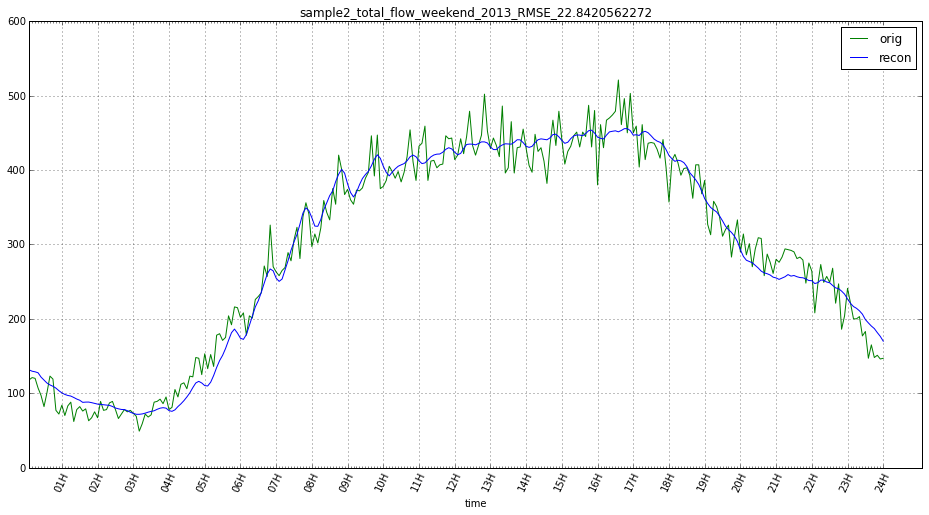

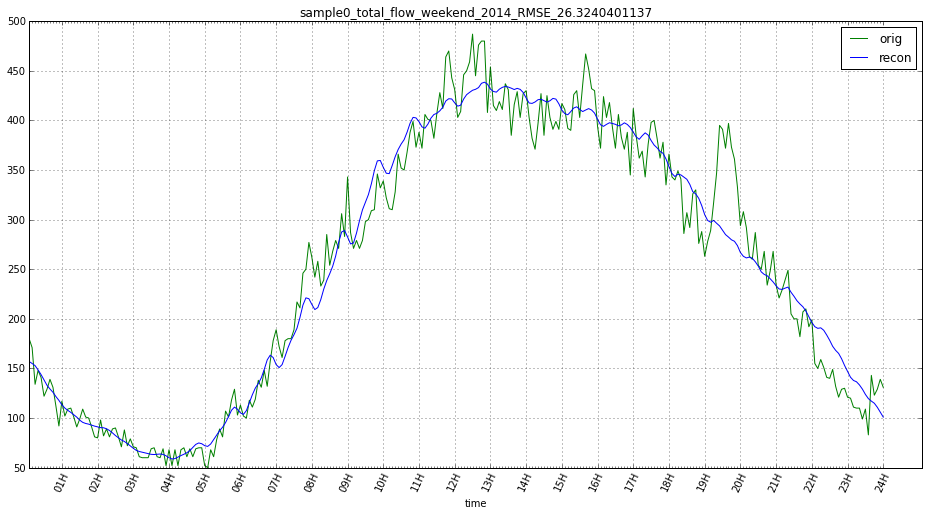

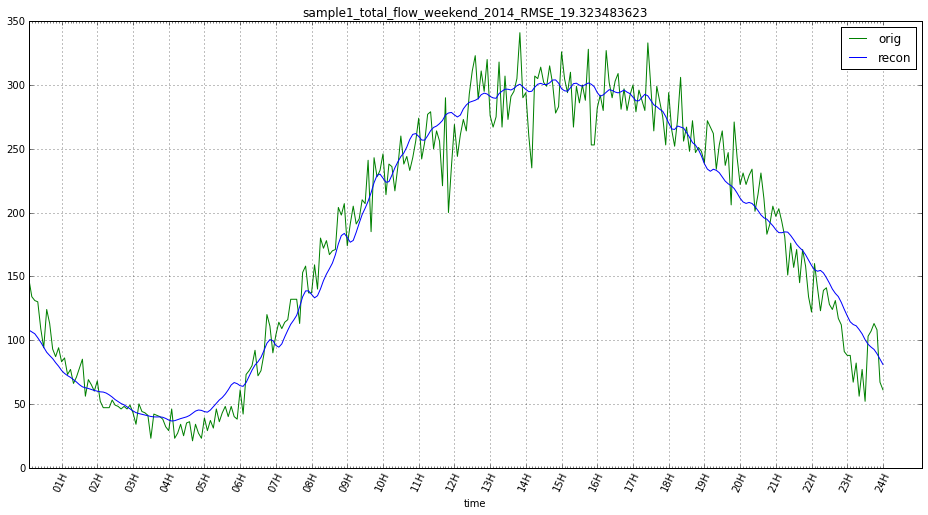

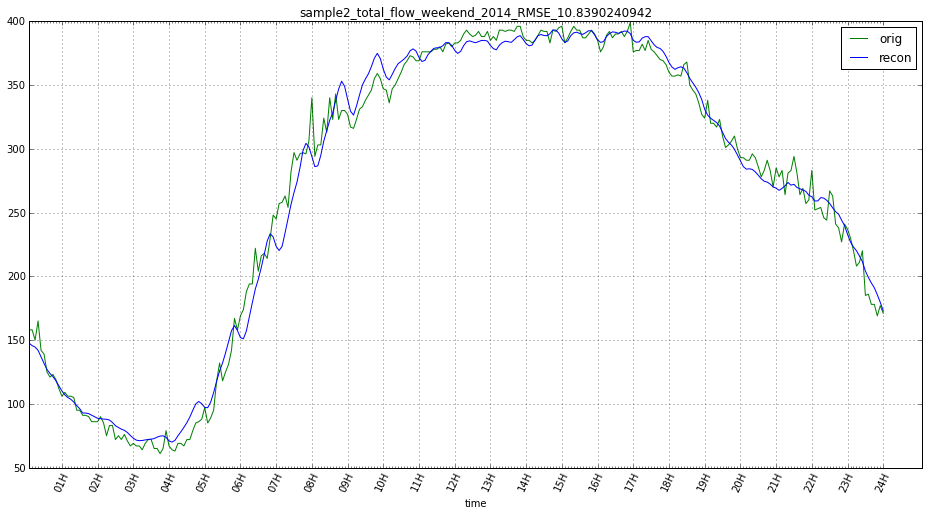

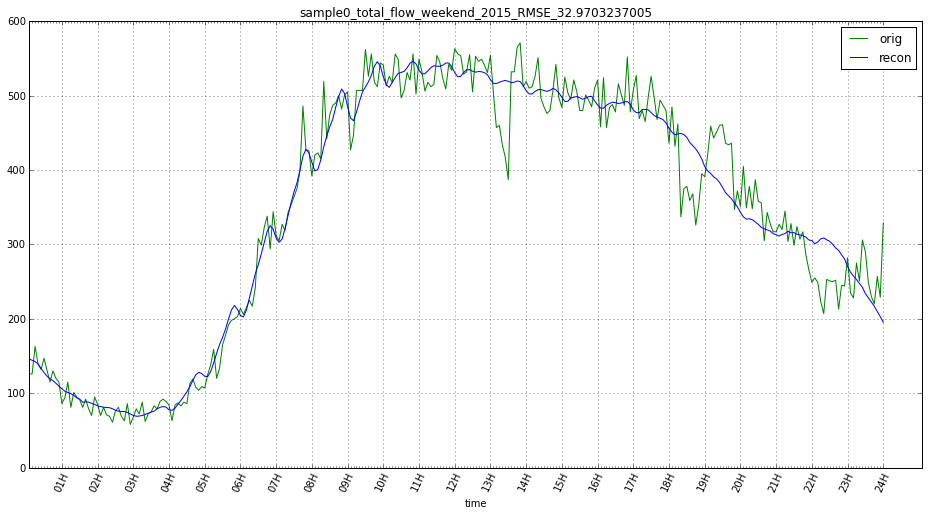

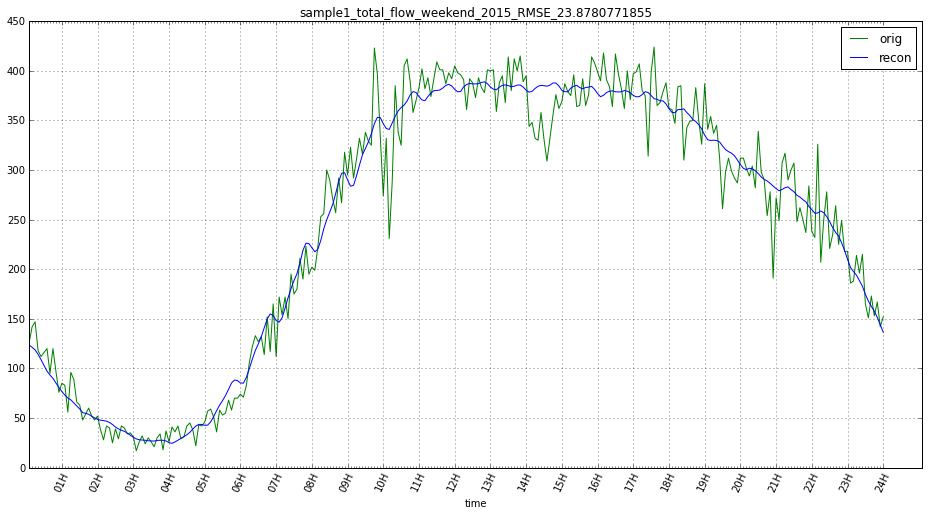

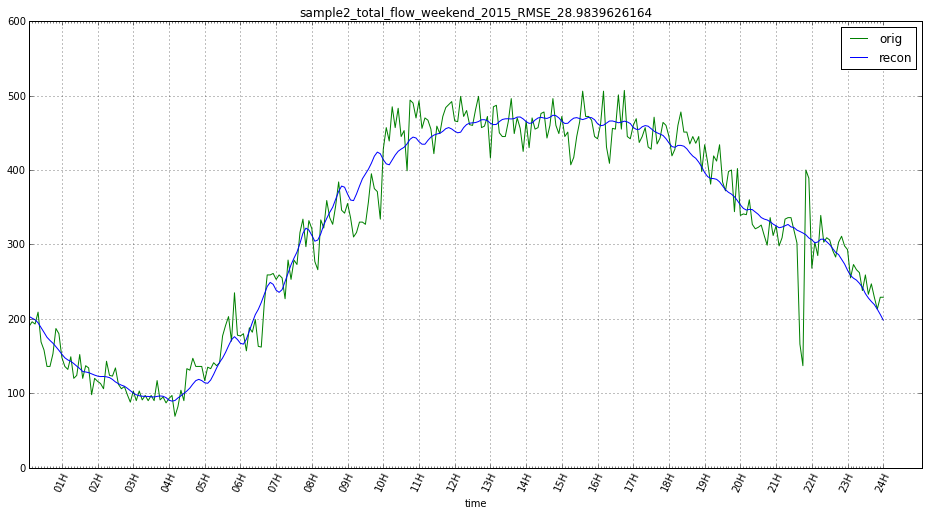

In [20]:
for p in partitions:
    for y in years:
        mean = pd.read_csv(base_mean_path.format(p, p, y), header=None).values[0]
        eigs = pd.read_csv(base_eigs_path.format(p, p, y), header=None).values  # eigenvectors per row matrix (5 X 288)
        samples_df= pd.read_csv(base_samples_path.format(p, p, y), header=None)
        #
        for i, a_row in samples_df.iterrows():
            arr= a_row.values

            rec= get_reconstruction(eigs, mean, arr)
            m_orig_x= rec[0]
            m_rec= rec[1]

            fig, ax= plt.subplots(figsize=figsize)
            ax.plot(m_orig_x, c='g', label='orig')
            ax.plot(m_rec, c='b', label='recon')
            #
            set_xaxis(ax, len(m_rec))
            rmse= np.sqrt(mean_squared_error(m_orig_x, m_rec))
            label= 'sample{}_total_flow_{}_{}_RMSE_{}'.format(i, p, y, rmse)
            ax.set_title(label)
            ax.legend()
            ax.set_xlabel("time")
            if i == 2:
                break